In [2]:
#!pip install networkx

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# C list of colors 
C = ["red", "green", "blue", "yellow"]

color_map = []
graph = nx.Graph()

# add_node
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(4)
graph.add_node(5)

# add_edge
graph.add_edge(1, 2, weight= 1)
graph.add_edge(1, 3, weight= 2)
graph.add_edge(2, 3, weight= 3)
graph.add_edge(2, 4, weight= 4)
graph.add_edge(3, 4, weight= 5)
graph.add_edge(4, 5, weight= 6)

sorted_degree = sorted([d for n, d in graph.degree()] , reverse = True)
print(sorted_degree)

# sort nodes V base on degree descendingly; value1 node name, value2 node degree
sorted_V = sorted(graph.degree, key=lambda x: x[1], reverse=True)
print(sorted_V)
print(len(sorted_V))

color_dict = {}

value = 0
for i in C:
    value = value + 1
    color_dict.update({value: })

color_dict["green"].append(1)
#color_dict.update({"green": 2})

print(color_dict)
#for i in C:
#     color_map.append(i)
# color_map.append(C[2])

# print(graph.number_of_nodes())
# print(graph.nodes)
# print(graph.edges)
# print(graph.adj[1])

# # method dijkstra
# source = 1
# target = 4
# temp = nx.shortest_path(graph, source = source, target = target) 

# print(nx.shortest_path(graph, source = source, target = target) )
# print("distance from node {} to {}: {}".format(source , target,len(temp) - 1))

# #nx.draw(graph, node_color = color_map, with_labels=True, node_size=500)
# 
# #nx.draw(graph, with_labels=True)



[3, 3, 3, 2, 1]
[(2, 3), (3, 3), (4, 3), (1, 2), (5, 1)]
5


AttributeError: 'NoneType' object has no attribute 'append'

descendingly [(3, 5), (4, 4), (2, 3), (5, 3), (6, 3), (1, 2)]
v[0] = 3
['red', 'green', 'blue', 'yellow']
ready
[0, 0, 0, 0]
['red' 'green' 'blue' 'yellow']
['yellow', 'blue', 'green', 'red']
v[0] = 4
['red', 'green', 'blue']
ready
[0, 0, 0]
['red' 'green' 'blue']
['blue', 'green', 'red']
v[0] = 2
['red', 'green']
ready
[0, 0]
['red' 'green']
['green', 'red']
v[0] = 5
['red', 'green']
ready
to the same color green
[5, 3, 2]
[0, 3]
['red' 'green']
['green', 'red']
v[0] = 6
['red']
ready
[0]
['red']
['red']
v[0] = 1
['red', 'blue']
ready
to the same color red
[1, 3, 6]
to the same color blue
[1, 2, 4]
[3, 3]
['red' 'blue']
['blue', 'red']
{3: 'yellow', 4: 'blue', 2: 'green', 5: 'green', 6: 'red', 1: 'blue'}


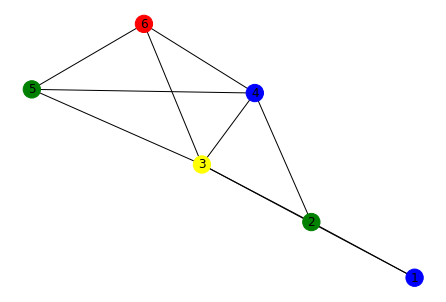

In [147]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def getCadidateColors(C, adjacent_colors):
    candidate_color = []
    for color in C :
        if color not in adjacent_colors:
            candidate_color.append(color)
    return candidate_color
            
#sort candidate_colors based on the minimal distance to the same color descendingly
def new_func(graph, candidate_colors, color_dict, current_node):
    print("ready")
    path_length_to_same_color = []
    for candidate_color in candidate_colors:
        #print(candidate_color)
        temp = []
        
        for color_node in color_dict.keys() :
            if candidate_color == color_dict[color_node]:
                temp = nx.shortest_path(graph, source = current_node, target = color_node)
                print("to the same color {}".format(candidate_color))
                print(temp)
        path_length_to_same_color.append(len(temp))
    
    print(path_length_to_same_color)
    path_length_to_same_color = np.array(path_length_to_same_color)
    candidate_colors = np.array(candidate_colors)
  
    inds = path_length_to_same_color.argsort()
    

    sorted_candidate_colors = candidate_colors[inds]
    print(sorted_candidate_colors)
    
    list_sorted_candidate_colors = sorted_candidate_colors.tolist()
    list_sorted_candidate_colors.reverse()
    print(list_sorted_candidate_colors)
    return list_sorted_candidate_colors[0]
    
    

# C list of colors 
C = ["red", "green", "blue", "yellow"]

graph = nx.Graph()

# add_node
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(4)
graph.add_node(5)
graph.add_node(6)


# add_edge
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)
graph.add_edge(2, 4)
graph.add_edge(3, 4)
graph.add_edge(3, 6)
graph.add_edge(3, 5)
graph.add_edge(4, 5)
graph.add_edge(6, 5)
graph.add_edge(6, 4)



# sort nodes V base on degree descendingly; value1 node name, value2 node degree
sorted_V = sorted(graph.degree, key=lambda x: x[1], reverse=True)
print("descendingly {}".format(sorted_V))

color_dict = {}
for i in sorted_V:
    color_dict.update({i[0]:None})
    

for v in sorted_V:
    adjacent_colors = []
    print("v[0] = {}".format(v[0]))
    for a in graph.adj[v[0]]:
        if (color_dict[a]) :
            adjacent_colors.append(color_dict[a])
    adjacent_colors.append(v[0]) 
    #candidate_colors = C except in adjacent_colors
    candidate_colors = getCadidateColors(C, adjacent_colors)
    print(candidate_colors)
    
    #sort candidate_colors based on the minimal distance to the same color descendingly
    candidate_color = new_func(graph, candidate_colors, color_dict, v[0])
    
    #colorOfCurrentNode = candidate_color[0]
    color_dict.update({v[0]:candidate_color})
    
print(color_dict)
color_map = []
for i in range(1, 7):
    color_map.append(color_dict[i])
nx.draw(graph, node_color = color_map, with_labels = True)
